# Exercise 2: Data Preparation

---
**Written by Hendi Lie (h2.lie@qut.edu.au) and Richi Nayak (r.nayak@qut.edu.au). All rights reserved.**

Welcome to the second practical exercise for IFN645. Each exercise sheet contains a number of theoretical and programming exercises, designed to strengthen both conceptual and practical understanding of data mining processes in this unit.

To answer conceptual questions, write the answer to each question on a paper/note with your reasoning. For programming exercises, open your iPython console/Jupyter notebook and use Python commands/libraries introduced in each practical to answer the questions. In many cases, you will need to write code to support your conceptual answers.

## 0. Prequisite

Perform the following steps before trying the exercises:
1. Import pandas as "pd" and load the house price dataset into "df".
2. Print dataset information to refresh your memory.

In [1]:
import pandas as pd

df = pd.read_csv('datasets/adult.csv', index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 1 to 48842
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48837 non-null object
fnlwgt            48692 non-null float64
education         48837 non-null object
education-num     48837 non-null float64
marital-status    48837 non-null object
occupation        48823 non-null object
relationship      48837 non-null object
race              48753 non-null object
sex               48837 non-null object
capital-gain      48837 non-null float64
capital-loss      48837 non-null float64
hours-per-week    48837 non-null float64
native-country    48837 non-null object
Salary            48842 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 6.0+ MB


## 1. Exploring data

Perform following operations and answer the following questions:
1. Describe the key statistics of "hours-per-week" column. What is the mean and median (50% quantile) value of this column?
2. Bin the "fnlwgt" column into 10 bins. How many entries are in each bin?
3. How many unique values are in "education" column? What is the number of occurences for each of these unique values?
4. Assume **Salary** is a binary variable of whether a person makes over 50K a year and **workclass** is a categorical variable representing type of the work (Private/Federal-gov/Local-gov). What is the correlation between work type and salary over 50K a year in this dataset? *Hint: use groupby.*

In [3]:
# 1. key statistics of rooms
df['hours-per-week'].describe()

count    48837.000000
mean        40.422016
std         12.391761
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [5]:
# 2. number of entries in each bin, derived from "fnlwgt" column
df['fnlwgt'].value_counts(bins=10)

(160096.5, 307908.0]      22710
(10806.884, 160096.5]     19883
(307908.0, 455719.5]       5212
(455719.5, 603531.0]        673
(603531.0, 751342.5]        151
(751342.5, 899154.0]         35
(899154.0, 1046965.5]        14
(1046965.5, 1194777.0]        7
(1342588.5, 1490400.0]        4
(1194777.0, 1342588.5]        3
Name: fnlwgt, dtype: int64

In [6]:
# 3. How many unique values in education and number of occurences for each of these values
df['education'].value_counts()

 HS-grad         15782
 Some-college    10878
 Bachelors        8023
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [7]:
# 4. Correlation between workclass and Salary
df.groupby(['workclass'])['Salary'].value_counts()

workclass          Salary
 ?                  <=50K     2534
                    >50K       265
 Federal-gov        <=50K      871
                    >50K       561
 Local-gov          <=50K     2209
                    >50K       927
 Never-worked       <=50K       10
 Private            <=50K    26515
                    >50K      7387
 Self-emp-inc       >50K       938
                    <=50K      757
 Self-emp-not-inc   <=50K     2784
                    >50K      1077
 State-gov          <=50K     1451
                    >50K       530
 Without-pay        <=50K       19
                    >50K         2
Name: Salary, dtype: int64

## 2. Plotting

Perform the following operations using `matplotlib.pyplot` and `seaborn`. Be mindful of each column type.
1. Create a distribution plot for "age" column.
2. Create a distribution plot for "workclass" column.
3. Create a distribution plot for "fnlwgt", grouped by the workclass.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\n9604014\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\n9604014\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


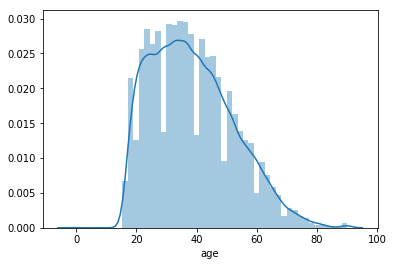

In [9]:
# distribution plot for the numerical column of "age"
g = sns.distplot(df['age'].dropna())
plt.show()

C:\Users\n9604014\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


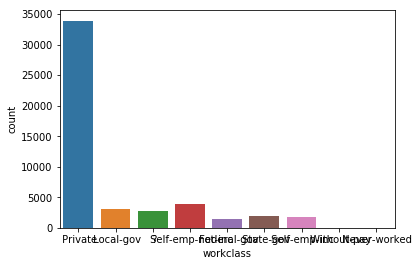

In [10]:
# distribution plot for the categorical column of "workclass"
g = sns.countplot(data = df, x = 'workclass')
plt.show()

C:\Users\n9604014\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


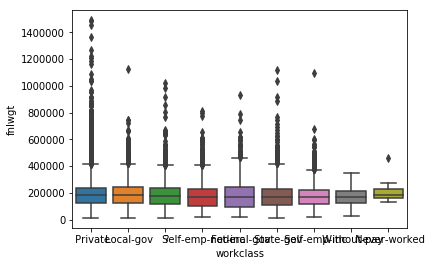

In [16]:
# distribution plot of Salary, grouped by workclass
g = sns.boxplot(x='workclass', y='fnlwgt', data=df)
plt.show()

## 3. Correcting errors in data

Perform the following operations and answer the following questions:
1. By performing data exploration, grouping and plotting, what problems have you revealed with the dataset?
2. Do you think **Address** column is useful for the predictive model? Why?
3. Impute missing values in **Car** variable. What imputation method will you use, and why?
4. Perform one hot encoding for **Type** and **Method** columns.
5. What columns do you think is not required here? Drop them.
6. What data preparation process can be performed for `Date` and `SellerG`?

### Answer

**[Question 1]** Firstly, pay attention to dataset information. There are missing values in **workclass, fnlwgt, education, education-num, marital-status, occupation, race,CouncilArea, Latitude, Longitude, RegionName, PropertyCount.** Ratio of missing values in these columns are different, thus the technique of choice for fixing them will be different too.

You can choose different process to apply if you can back it up with valid reasons. For this exercise, we will apply the following techniques:
1. **Dropping rows with missing values**, applied to **Distance, Postcode, CouncilArea, Regionname and Propertycount**. These columns have relatively low number of missing values, thus removing rows with missing values is a simple approach that will not significantly impact data available for analysis.
2. **Imputation**, applied to **Bathroom** and **Car**. There are more missing values in these columns, however removing them completely will reduce amount of information significantly. We could also reasonably approximate these variables, making them suitable for imputation.
3. **Flagging** for **Lattitude** and **Longtitude**. While the rate of missing values in these two columns are similar with **Bathroom** and **Car**, approximating location of houses is much harder. Therefore, creating new columns of **Latitude_nan** and **Longtitude_nan**, denoting presence of missing values in respective column, can be a suitable approach.
4. **Drop columns**, for **Landsize, BuildingArea and YearBuilt**. All three columns have significant ratio of missing values, thus dropping them is necessary.

**[Question 2]** Address column is very specific to each house. Building a model on specific addresses can result in an overfitting model, thus we should not include it in the analysis.

**[Question 3]** **Car** is a interval variable. Both median and mean can be a valid imputations strategy.

**[Question 4]** As follows.

**[Question 5]** We have decided to drop **Address, Landsize, BuildingArea and YearBuilt**. Other columns that is not required will be **Price**, as the objective of this exercise is to simply predict whether the price is above median or not (binary classification). Predicting an interval variable like **Price** will be a regression task instead of classification.

**[Question 6]** Looking at `Date` and `SellerG`, there are a number of techniques that can be applied. For date/time variables, most models cannot utilise raw data. Thus, commonly a date is preprocessed and represented in different format, for example week/month to understand whether houses are more expensive at certain time in the year. In regards to `SellerG`, the problem is the number of levels/unique values in the variable. There are ~330 unique sellers, with some of them only selling few houses. In addition, new sellers can emerge in future data very easily, thus training models to seller names can reduces robustness of the model. There are steps that can be taken to fix this (e.g. only including top N/big sellers), but for simplicity we will simply drop this variable.


Code to perform all mentioned actions is as follow:

In [11]:
def preprocess_data(df):
    # Q1.4 and Q6.2
    df = df.drop(['Address', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price', 'Bedroom2', 'SellerG'], axis=1)
    
    # Q1.1
    cols_miss_drop =['Postcode', 'CouncilArea', 'Regionname', 'Propertycount']
    mask = pd.isnull(df['Distance'])

    for col in cols_miss_drop:
        mask = mask | pd.isnull(df[col])

    df = df[~mask]
    
    # Q1.2
    df['Bathroom'].fillna(df['Bathroom'].mean(), inplace=True)
    df['Car'].fillna(df['Car'].mean(), inplace=True)
    
    df['Latitude_nan'] = pd.isnull(df['Lattitude'])
    df['Longtitude_nan'] = pd.isnull(df['Longtitude'])
    df['Lattitude'].fillna(0, inplace=True)
    df['Longtitude'].fillna(0, inplace=True)
    
    # Q6.1. Change date into weeks and months
    df['Sales_week'] = pd.to_datetime(df['Date']).dt.week
    df['Sales_month'] = pd.to_datetime(df['Date']).dt.month
    df = df.drop(['Date'], axis=1)  # drop the date, not required anymore
    
    # Q4
    df = pd.get_dummies(df)
    
    return df

In [12]:
df2 = preprocess_data(df)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24194 entries, 0 to 24196
Columns: 402 entries, Rooms to Regionname_Western Victoria
dtypes: bool(2), float64(7), int64(4), uint8(389)
memory usage: 11.2 MB


The dataset has expanded into ~400 columns, mostly consisting of one-hot variables from `Suburb`.

# Answer

When you are finished with all exercise questions, the sample answers are available in the following Github repository. Remember, please try the exercises first before viewing the answers.

https://github.com/liehendi11/IFN645_answers